<a href="https://colab.research.google.com/github/tcathy2009/AI/blob/main/%E3%80%8CDemo_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab介紹

Google Colab是一個基於 Jupyter Notebook 的免費CPU虛擬機，透過瀏覽器即可編寫程式，當離開瀏覽器操作畫面，虛擬機上的操作資料都被清空，所以使用者不需要擔心操作不慎搞壞機器。除了資料存至雲端虛擬機上之外，還可以連接Google Drive雲端硬碟，將訓練完成的AI模型或資料科學處理的資料進行儲存，而Google Colab擁有以下幾個特點：
不需任何設定：瀏覽器開起Google Colab，連線完成即建立玩虛擬機，就可以使用Google Colab的功能。
免費使用 GPU或TPU：Colab中可選用的GPU通常包括Nvidia K80，T4，P4和P100，但使用者不能選擇使用哪種類型的GPU，由於免費使用的關係，Colab無法保證資源，會依據時間和使用者有浮動，筆記本最長可執行12小時；如果一定需要使用GPU，可以選擇升級為付費版本Colab Pro，每月支付9美金，優先存取更快速的 GPU 和 TPU。
共用功能：Colab筆記本是存在Google Drive，方便管理ipynb檔案，也可以將程式檔案ipynb下載分享給其他人使用。
開啟GitHub筆記本：透過開啟筆記本功能，可以點選GitHub選項，貼上你從GitHub看到的ipynb檔案網址，就可以在Google Colab開啟檔案或複製至自身的Google Drive。


# Hello

在colab註冊完帳號之後, 可以看到說明非常詳細的歡迎頁面,
這個歡迎頁面本身就是一個Jupiter notebook, 你可以直接在上面編輯或執行程式.
你也可以直接在"檔案>>新增筆記本", 會直接開起一個新的notebook, 同時在你的google drive可以看到這個新增的檔案


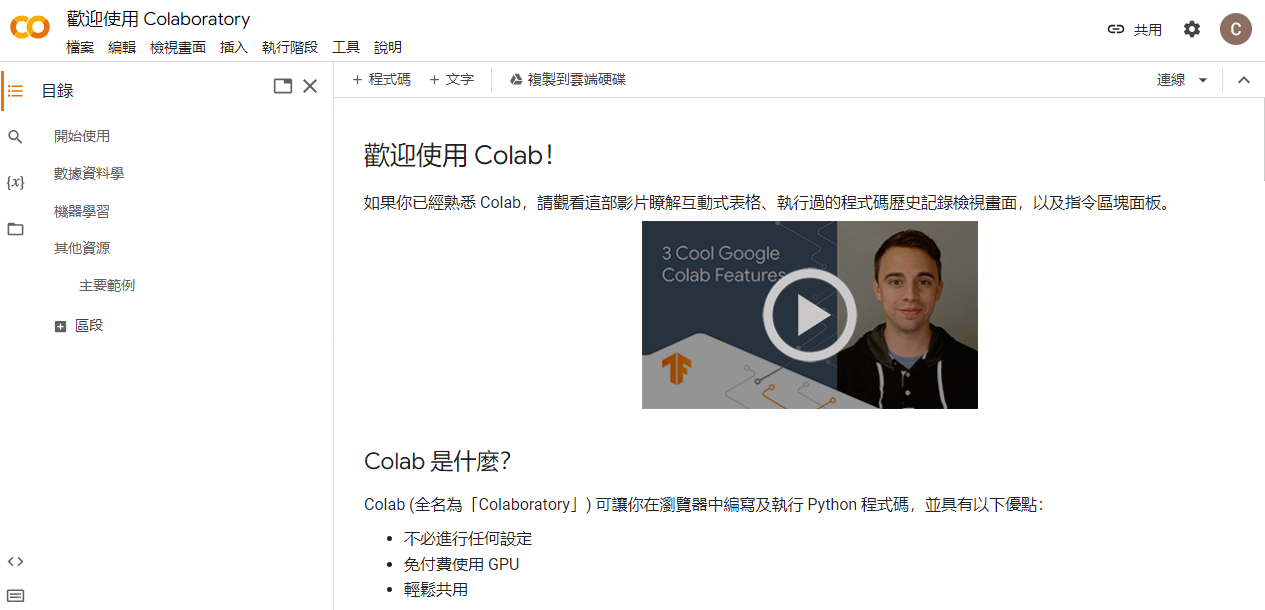

設定: 雲端硬碟/github/資費方案
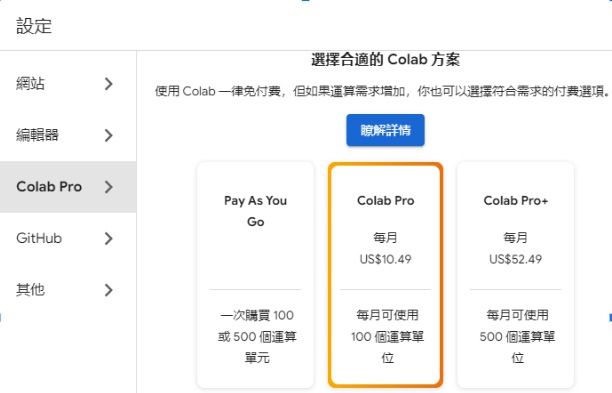


In [ ]:
print('Hello Colab!!')

Hello Colab!!


In [ ]:
name = input("請問大名?")
print('Hello '+ name)

請問大名?Cathy
Hello Cathy


**可在文字區塊放筆記**::

---



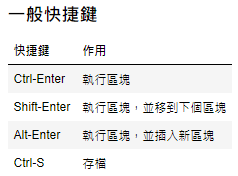

# titanic tutorial

Demo: 直接上傳data file到content/data folder使用
1. 在content建立data folder
2. upload file

In [ ]:
import numpy as np
import pandas as pd

# print data file
import os
for dirname, _, filenames in os.walk('/content/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/data/gender_submission.csv
/content/data/test.csv
/content/data/train.csv


In [ ]:
train_data = pd.read_csv("/content/data/train.csv")
train_data.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
test_data = pd.read_csv("/content/data/test.csv")
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


左列的變數清單可以即時觀看變數內容

In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# mount google drive

Since a Colab notebook is hosted on Google’s cloud servers, there’s no direct access to files on your local drive (unlike a notebook hosted on your machine) or any other environment by default.

However, Colab provides various options to connect to almost any data source you can imagine. Let us see how.

output file以寫入content folder, 不會主動將file存到雲端硬碟
1. 可點選file, 下載檔案到本機
2. 可透過mount google drive存檔

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
# 出現提示欄進行授權, 完成帳戶授權後, 可在content看到gdrive以mount到google drive

Mounted at /content/gdrive


In [ ]:
output.to_csv('/content/gdrive/MyDrive/titanic_output.csv', index=False)
# 會將csv檔存放在google drive根目錄


In [ ]:
# 從google drive讀檔
df_verify = pd.read_csv('/content/gdrive/MyDrive/titanic_output.csv')
print(df_verify)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [ ]:
# save model
import joblib

joblib.dump(model, "/content/gdrive/MyDrive/model/rf.joblib")

['/content/gdrive/MyDrive/model/rf.joblib']

In [ ]:
# 看看model file
!ls /content/gdrive/MyDrive/model

rf.joblib


In [ ]:
# load model
loaded_rf = joblib.load("/content/gdrive/MyDrive/model/rf.joblib")
predictions2 = loaded_rf.predict(X_test)
predictions2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

前面使用上傳的data file, 也可改成直接讀取google drive的檔案

In [ ]:
test_data = pd.read_csv("/content/gdrive/MyDrive/data/test.csv")
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


取用git上的data file

In [ ]:
# 透過Linux指令取得github的檔案, 會放在content folder下
!git clone https://github.com/tcathy2009/AI.git

Cloning into 'AI'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 33 (delta 10), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (33/33), 51.80 KiB | 5.76 MiB/s, done.
Resolving deltas: 100% (10/10), done.


直接使用github的data file
1. 在github點選file, view Raw, copy the URL of the raw file,
2. use this URL as the location of your file.
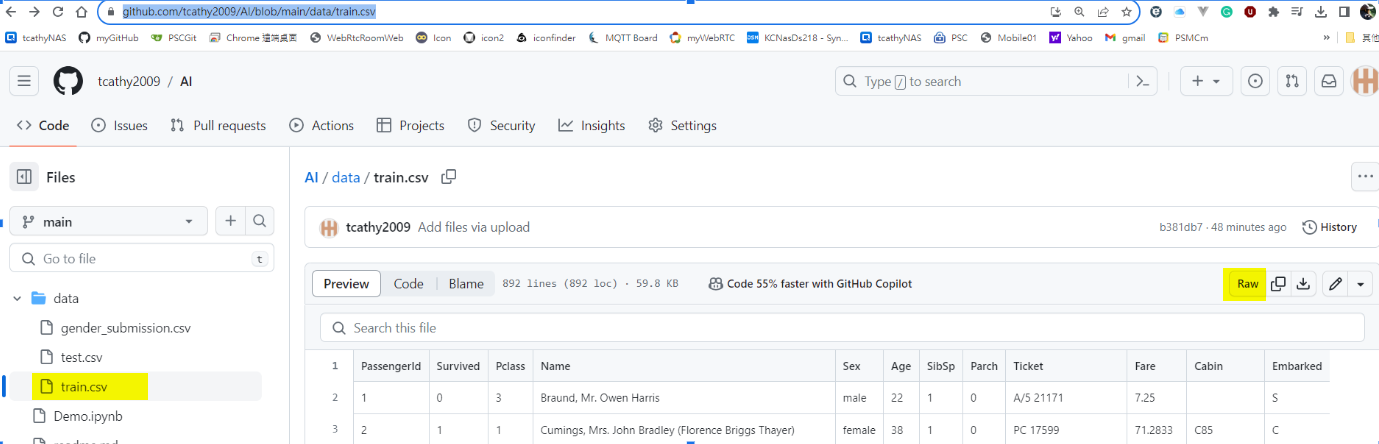
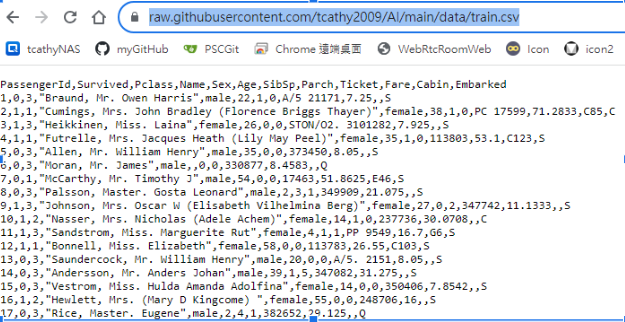

In [ ]:
import pandas as pd
train_data = pd.read_csv('https://raw.githubusercontent.com/tcathy2009/AI/main/data/train.csv')
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S



檔案>>在github儲存副本

將程式檔案commit到github
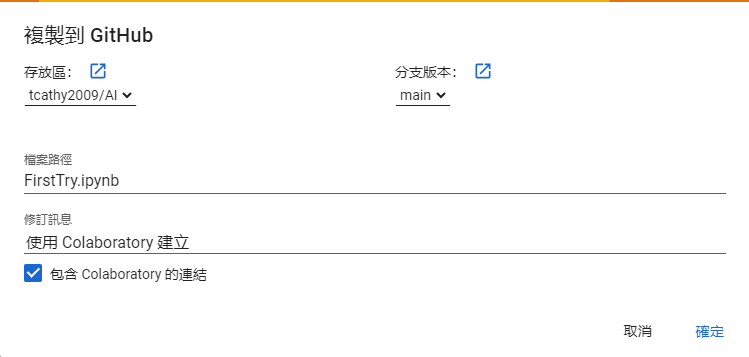
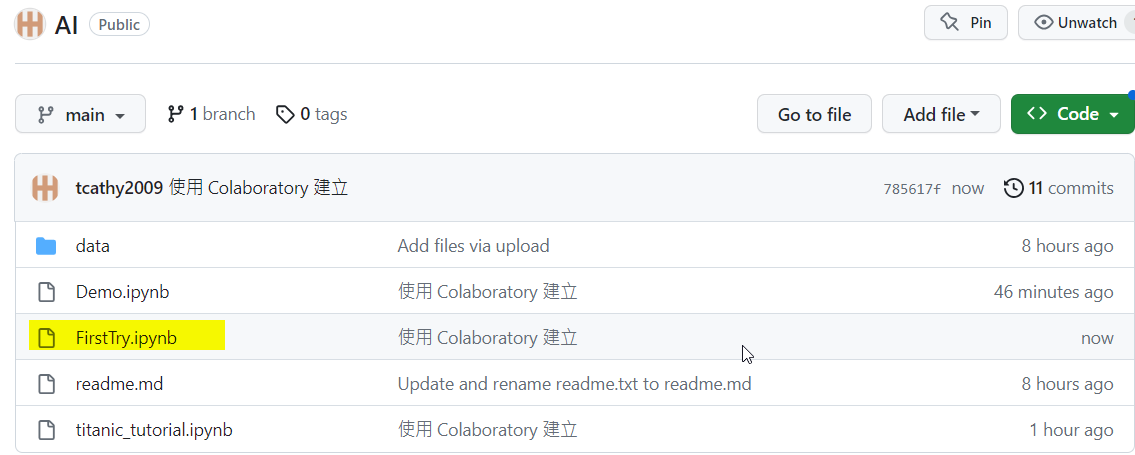

# 變更執行階段: CPU/GPU


功能列: 執行階段>>變更執行階段

CPU:
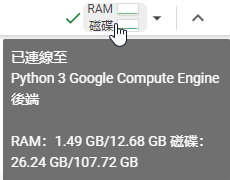
 GPU:
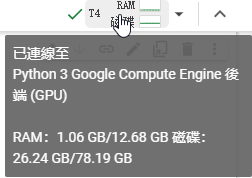

In [ ]:
# 查看目前GPU使用的型號
! nvidia-smi

Sun Aug 27 16:32:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Kaggle

Easiest way to download kaggle data in Google Colab Please follow the steps below to download and use kaggle data within Google Colab:

Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

Click on Create New API Token - It will download kaggle.json file on your machine.

安裝 Kaggle API : Go to your Google Colab project file and run the following commands:
1) ! pip install -q kaggle
2) from google.colab import files

files.upload()



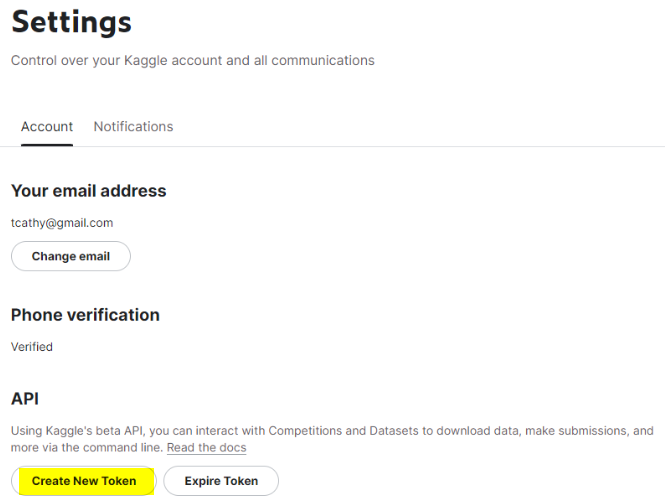

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tsengcathy","key":"002e6fc2f3776ac747a09f55ee5cc093"}'}

Choose the kaggle.json file that you downloaded
3) ! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
!pwd

/content


In [ ]:
!pwd
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

/content


Make directory named kaggle and copy kaggle.json file there.
4) ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# 設置擁有者可讀寫，其他人不可讀寫執行
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Change the permissions of the file.
# 5) ! kaggle datasets list

# - That's all ! You can check if everything's okay by running this command.
!kaggle datasets list


ref                                                               title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023                   Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38           8838        285  1.0              
joebeachcapital/life-longevity-factors                            Life Longevity Factors                               8KB  2023-08-23 01:01:55            595         26  1.0              
nelgiriyewithana/countries-of-the-world-2023                      Global Country Information Dataset 2023             23KB  2023-07-08 20:37:33          14711        577  1.0              
kapturovalexander/gold-and-silver-prices-2013-2023     

In [ ]:
# Download Data
# ! kaggle competitions download -c 'name-of-competition'
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 63.9MB/s]


In [ ]:
# Use unzip command to unzip the data:
# For example,
# Create a directory named train,
# ! mkdir train
!mkdir train
# unzip train data there,
!unzip titanic.zip -d train

Archive:  titanic.zip
  inflating: train/gender_submission.csv  
  inflating: train/test.csv          
  inflating: train/train.csv         


sample code ref: https://www.kaggle.com/code/gusthema/titanic-competition-w-tensorflow-decision-forests

In [ ]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 90.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 49.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    F

In [ ]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf
import tensorflow_decision_forests as tfdf

print(f"Found TF-DF {tfdf.__version__}")

Found TF-DF 1.5.0


In [ ]:
# Load dataset
train_df = pd.read_csv("./train/train.csv")
serving_df = pd.read_csv("./train/test.csv")

train_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
# Prepare dataset
# We will apply the following transformations on the dataset.

# Tokenize the names.
# For example, "Braund, Mr. Owen Harris" will become ["Braund", "Mr.", "Owen", "Harris"].
# Extract any prefix in the ticket.
# For example ticket "STON/O2. 3101282" will become "STON/O2." and 3101282.
def preprocess(df):
    df = df.copy()

    def normalize_name(x):
        return " ".join([v.strip(",()[].\"'") for v in x.split(" ")])

    def ticket_number(x):
        return x.split(" ")[-1]

    def ticket_item(x):
        items = x.split(" ")
        if len(items) == 1:
            return "NONE"
        return "_".join(items[0:-1])

    df["Name"] = df["Name"].apply(normalize_name)
    df["Ticket_number"] = df["Ticket"].apply(ticket_number)
    df["Ticket_item"] = df["Ticket"].apply(ticket_item)
    return df

preprocessed_train_df = preprocess(train_df)
preprocessed_serving_df = preprocess(serving_df)

preprocessed_train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item
0,1,0,3,Braund Mr Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,21171,A/5
1,2,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.0,1,0,PC 17599,71.2833,C85,C,17599,PC
2,3,1,3,Heikkinen Miss Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282,STON/O2.
3,4,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.0,1,0,113803,53.1000,C123,S,113803,NONE
4,5,0,3,Allen Mr William Henry,male,35.0,0,0,373450,8.0500,NaN,S,373450,NONE


In [ ]:
# Let's keep the list of the input features of the model. Notably, we don't want to train our model on the "PassengerId" and "Ticket" features.

input_features = list(preprocessed_train_df.columns)
input_features.remove("Ticket")
input_features.remove("PassengerId")
input_features.remove("Survived")
#input_features.remove("Ticket_number")

print(f"Input features: {input_features}")

Input features: ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Ticket_number', 'Ticket_item']


In [ ]:
# Convert Pandas dataset to TensorFlow Dataset
def tokenize_names(features, labels=None):
    """Divite the names into tokens. TF-DF can consume text tokens natively."""
    features["Name"] =  tf.strings.split(features["Name"])
    return features, labels

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(preprocessed_train_df,label="Survived").map(tokenize_names)
serving_ds = tfdf.keras.pd_dataframe_to_tf_dataset(preprocessed_serving_df).map(tokenize_names)

In [ ]:
# Train model with default parameters
# Train model
# First, we are training a GradientBoostedTreesModel model with the default parameters.

In [ ]:
model = tfdf.keras.GradientBoostedTreesModel(
    verbose=0, # Very few logs
    features=[tfdf.keras.FeatureUsage(name=n) for n in input_features],
    exclude_non_specified_features=True, # Only use the features in "features"
    random_seed=1234,
)
model.fit(train_ds)

self_evaluation = model.make_inspector().evaluation()
print(f"Accuracy: {self_evaluation.accuracy} Loss:{self_evaluation.loss}")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Accuracy: 0.8260869383811951 Loss:0.8608942627906799


In [ ]:
# Train model with improved default parameters
# Now you'll use some specific parameters when creating the GBT model

model = tfdf.keras.GradientBoostedTreesModel(
    verbose=0, # Very few logs
    features=[tfdf.keras.FeatureUsage(name=n) for n in input_features],
    exclude_non_specified_features=True, # Only use the features in "features"

    #num_trees=2000,

    # Only for GBT.
    # A bit slower, but great to understand the model.
    # compute_permutation_variable_importance=True,

    # Change the default hyper-parameters
    # hyperparameter_template="benchmark_rank1@v1",

    #num_trees=1000,
    #tuner=tuner

    min_examples=1,
    categorical_algorithm="RANDOM",
    #max_depth=4,
    shrinkage=0.05,
    #num_candidate_attributes_ratio=0.2,
    split_axis="SPARSE_OBLIQUE",
    sparse_oblique_normalization="MIN_MAX",
    sparse_oblique_num_projections_exponent=2.0,
    num_trees=2000,
    #validation_ratio=0.0,
    random_seed=1234,

)
model.fit(train_ds)

self_evaluation = model.make_inspector().evaluation()
print(f"Accuracy: {self_evaluation.accuracy} Loss:{self_evaluation.loss}")

Accuracy: 0.760869562625885 Loss:1.0501841306686401


In [ ]:
model.summary()

Model: "gradient_boosted_trees_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (11):
	Age
	Cabin
	Embarked
	Fare
	Name
	Parch
	Pclass
	Sex
	SibSp
	Ticket_item
	Ticket_number

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.           "Sex"  0.704486 ################
    2.           "Age"  0.352416 #####
    3.          "Fare"  0.262622 ##
    4.          "Name"  0.196262 
    5.        "Pclass"  0.182029 
    6. "Ticket_number"  0.179701 
    7.   "Ticket_item"  0.179391 
    8.         "Parch"  0.178766 
    9.      "Embarked"  0.178126 
   10.         "SibSp"  0.171961 

Variable Importance: NUM_AS_ROOT:
    1.  "Sex" 40.000000 ##########

產生結果: train/submission.csv

In [ ]:
# Make predictions
def prediction_to_kaggle_format(model, threshold=0.5):
    proba_survive = model.predict(serving_ds, verbose=0)[:,0]
    return pd.DataFrame({
        "PassengerId": serving_df["PassengerId"],
        "Survived": (proba_survive >= threshold).astype(int)
    })

def make_submission(kaggle_predictions):
    path="./train/submission.csv"
    kaggle_predictions.to_csv(path, index=False)
    print(f"Submission exported to {path}")

kaggle_predictions = prediction_to_kaggle_format(model)
make_submission(kaggle_predictions)
!head ./train/submission.csv

Submission exported to ./train/submission.csv
PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,1
898,0
899,0
900,1


In [ ]:
# Training a model with hyperparameter tunning
# Hyper-parameter tuning is enabled by specifying the tuner constructor argument of the model. The tuner object contains all the configuration of the tuner (search space, optimizer, trial and objective).

tuner = tfdf.tuner.RandomSearch(num_trials=1000)
tuner.choice("min_examples", [2, 5, 7, 10])
tuner.choice("categorical_algorithm", ["CART", "RANDOM"])

local_search_space = tuner.choice("growing_strategy", ["LOCAL"])
local_search_space.choice("max_depth", [3, 4, 5, 6, 8])

global_search_space = tuner.choice("growing_strategy", ["BEST_FIRST_GLOBAL"], merge=True)
global_search_space.choice("max_num_nodes", [16, 32, 64, 128, 256])

#tuner.choice("use_hessian_gain", [True, False])
tuner.choice("shrinkage", [0.02, 0.05, 0.10, 0.15])
tuner.choice("num_candidate_attributes_ratio", [0.2, 0.5, 0.9, 1.0])


tuner.choice("split_axis", ["AXIS_ALIGNED"])
oblique_space = tuner.choice("split_axis", ["SPARSE_OBLIQUE"], merge=True)
oblique_space.choice("sparse_oblique_normalization",
                     ["NONE", "STANDARD_DEVIATION", "MIN_MAX"])
oblique_space.choice("sparse_oblique_weights", ["BINARY", "CONTINUOUS"])
oblique_space.choice("sparse_oblique_num_projections_exponent", [1.0, 1.5])

# Tune the model. Notice the `tuner=tuner`.
tuned_model = tfdf.keras.GradientBoostedTreesModel(tuner=tuner)
tuned_model.fit(train_ds, verbose=0)

tuned_self_evaluation = tuned_model.make_inspector().evaluation()
print(f"Accuracy: {tuned_self_evaluation.accuracy} Loss:{tuned_self_evaluation.loss}")

Use /tmp/tmpjk968dk8 as temporary training directory
Accuracy: 0.8630136847496033 Loss:0.6804219484329224


In [ ]:
# Making an ensemble
# Here you'll create 100 models with different seeds and combine their results

# This approach removes a little bit the random aspects related to creating ML models

# In the GBT creation is used the honest parameter. It will use different training examples to infer the structure and the leaf values. This regularization technique trades examples for bias estimates.

predictions = None
num_predictions = 0

for i in range(100):
    print(f"i:{i}")
    # Possible models: GradientBoostedTreesModel or RandomForestModel
    model = tfdf.keras.GradientBoostedTreesModel(
        verbose=0, # Very few logs
        features=[tfdf.keras.FeatureUsage(name=n) for n in input_features],
        exclude_non_specified_features=True, # Only use the features in "features"
        #min_examples=1,
        #categorical_algorithm="RANDOM",
        ##max_depth=4,
        #shrinkage=0.05,
        ##num_candidate_attributes_ratio=0.2,
        #split_axis="SPARSE_OBLIQUE",
        #sparse_oblique_normalization="MIN_MAX",
        #sparse_oblique_num_projections_exponent=2.0,
        #num_trees=2000,
        ##validation_ratio=0.0,
        random_seed=i,
        honest=True,
    )
    model.fit(train_ds)

    sub_predictions = model.predict(serving_ds, verbose=0)[:,0]
    if predictions is None:
        predictions = sub_predictions
    else:
        predictions += sub_predictions
    num_predictions += 1

predictions/=num_predictions

kaggle_predictions = pd.DataFrame({
        "PassengerId": serving_df["PassengerId"],
        "Survived": (predictions >= 0.5).astype(int)
    })

make_submission(kaggle_predictions)

i:0


i:1


i:2


i:3
i:4
i:5
i:6
i:7
i:8
i:9
i:10
i:11
i:12
i:13
i:14
i:15
i:16
i:17
i:18
i:19
i:20
i:21
i:22
i:23
i:24
i:25
i:26
i:27
i:28
i:29
i:30
i:31
i:32
i:33
i:34
i:35
i:36
i:37
i:38
i:39
i:40
i:41
i:42
i:43
i:44
i:45
i:46
i:47
i:48
i:49
i:50
i:51
i:52
i:53
i:54
i:55
i:56
i:57
i:58
i:59
i:60
i:61
i:62
i:63
i:64
i:65
i:66
i:67
i:68
i:69
i:70
i:71
i:72
i:73
i:74
i:75
i:76
i:77
i:78
i:79
i:80
i:81
i:82
i:83
i:84
i:85
i:86
i:87
i:88
i:89
i:90
i:91
i:92
i:93
i:94
i:95
i:96
i:97
i:98
i:99
Submission exported to ./train/submission.csv


把結果summit到kaggle


In [ ]:
# Submit
# !kaggle competitions submit -c <competition-name> -f submission.csv -m "Notes"
!kaggle competitions submit -c titanic -f ./train/submission.csv -m "Notes"
# example:
# !kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "Notes"

100% 2.77k/2.77k [00:02<00:00, 1.22kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [ ]:
# View results
# !kaggle competitions submissions -c <competition-name>
!kaggle competitions submissions -c titanic
# example:
# !kaggle competitions submissions -c bike-sharing-demand

fileName        date                 description  status    publicScore  privateScore  
--------------  -------------------  -----------  --------  -----------  ------------  
submission.csv  2023-08-27 18:01:13  Notes        complete  0.80143                    
submission.csv  2023-08-27 04:49:54  Notes        complete  0.80143                    


可以在Kaggle的Leaderboard查看分數及排名
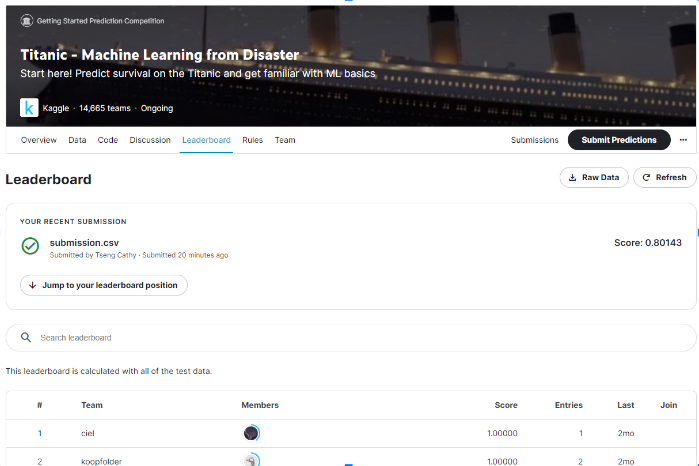
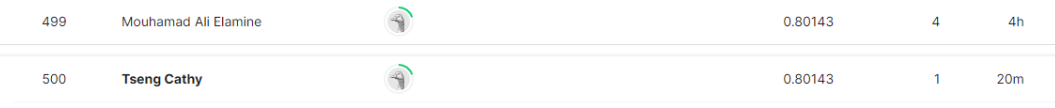